In [1]:
# STAT 574 HW1 Problem 4

# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
# Importing the data

card_path = "C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/\
card_transdata.csv"
card_data = pd.read_csv(card_path)

X = card_data.iloc[:,0:7].values
y = card_data.iloc[:,7].values

# Splitting the data into 80% training and 20% testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=122470)

# Fitting binary tree with Gini splitting criterion.

gini_tree = DecisionTreeClassifier(max_leaf_nodes=4, criterion="gini",
                                   random_state=380381)
gini_tree_fit = gini_tree.fit(X_train, y_train)

In [3]:
# (a) Compute prediction accuracy, misclassification rate, sensitivity,
# specficity for a range of cutoffs between 0.01 and 0.99.

y_pred = gini_tree_fit.predict_proba(X_test)
total = len(y_pred)

cutoff = []
accuracy = []
misclassrate = []
sensitivity = []
specificity = []
oneminusspec = []
distance = []

for i in range(99):
    tp=0
    fp=0
    tn=0
    fn=0
    cutoff.append(0.01*(i+1))
    for sub1, sub2 in zip(y_pred[::,1], y_test):
        tp_ind=1 if (sub1>0.01*(i+1) and sub2==1) else 0
        fp_ind=1 if (sub1>0.01*(i+1) and sub2==0) else 0
        tn_ind=1 if (sub1<0.01*(i+1) and sub2==0) else 0
        fn_ind=1 if (sub1<0.01*(i+1) and sub2==1) else 0
        tp+=tp_ind
        fp+=fp_ind
        tn+=tn_ind
        fn+=fn_ind
    accuracy_i = (tp+tn)/total
    misclassrate_i = (fp+fn)/total
    sensitivity_i = tp/(tp+fn)
    specificity_i = tn/(fp+tn)
    oneminusspec_i = fp/(fp+tn)
    distance_i = np.sqrt(pow(oneminusspec_i,2)+pow(1-sensitivity_i,2))

    accuracy.append(accuracy_i)
    misclassrate.append(misclassrate_i)
    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)
    oneminusspec.append(oneminusspec_i)
    distance.append(distance_i)

Text(0, 0.5, 'Sensitivity')

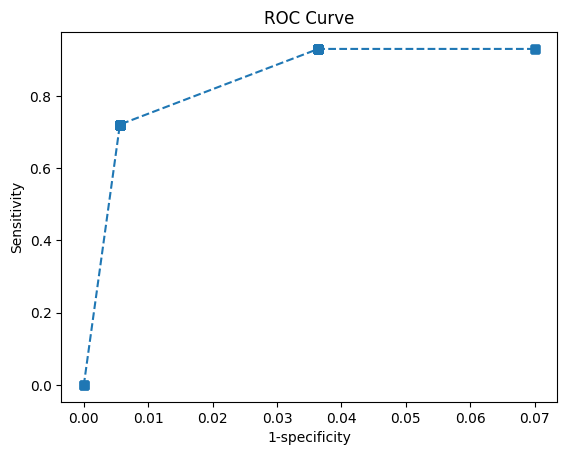

In [4]:
# (b) Construct a ROC Curve.

plt.plot(oneminusspec, sensitivity, linestyle='--', marker='s')
plt.title('ROC Curve')
plt.xlabel('1-specificity')
plt.ylabel('Sensitivity')

In [5]:
# (c) Compute the minimal distance between the ROC Curve and the ideal
# point (0,1) and output accuracy, misclassification rate, sensitivity,
# specificity, and cutoff that corresponds to the minimal distance.

df = pd.DataFrame({'accuracy':accuracy, 'misclassrate':misclassrate, 'sensitivity':sensitivity,
                   'specificity':specificity, 'oneminusspec':oneminusspec, 'distance':distance,
                   'cutoff':cutoff})
min_distance = min(distance)
optimal = df[df['distance'] == min_distance]
print(optimal)

    accuracy  misclassrate  sensitivity  specificity  oneminusspec  distance  \
7       0.96          0.04     0.930233     0.963585      0.036415  0.078699   
8       0.96          0.04     0.930233     0.963585      0.036415  0.078699   
9       0.96          0.04     0.930233     0.963585      0.036415  0.078699   
10      0.96          0.04     0.930233     0.963585      0.036415  0.078699   
11      0.96          0.04     0.930233     0.963585      0.036415  0.078699   
12      0.96          0.04     0.930233     0.963585      0.036415  0.078699   
13      0.96          0.04     0.930233     0.963585      0.036415  0.078699   
14      0.96          0.04     0.930233     0.963585      0.036415  0.078699   
15      0.96          0.04     0.930233     0.963585      0.036415  0.078699   
16      0.96          0.04     0.930233     0.963585      0.036415  0.078699   
17      0.96          0.04     0.930233     0.963585      0.036415  0.078699   
18      0.96          0.04     0.930233 

In [8]:
# (d) Compute the area under the ROC Curve

df = df.sort_values('oneminusspec', ascending=True)
df['lagx'] = df['oneminusspec'].shift(1)
df['lagy'] = df['sensitivity'].shift(1)
df['lagx'] = np.nan_to_num(df['lagx'], nan=0)
df['lagy'] = np.nan_to_num(df['lagy'], nan=0)
df['trapezoid'] = ((df['oneminusspec']-df['lagx'])*(df['sensitivity']+df['lagy']))/2
AUC = 1 - sum(df['trapezoid'])
print(AUC)

0.9412741840922415
